In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
df = pd.read_csv('Bengalore_house_price.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


1. Data Cleaning

In [3]:
df.shape

(13320, 9)

In [4]:
df2 = df.drop(['availability', 'society', 'area_type'], axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df3 = df2.copy()

In [7]:
df3['balcony'] = df2['balcony'].fillna(value=0)
df3.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [8]:
df3 = df3.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 6)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [12]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,0.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    
    if len(tokens) == 2:
        return (float(tokens[0])+ float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None 

In [19]:
convert_sqft_to_num('2020')

2020.0

In [20]:
convert_sqft_to_num('2020-2045')

2032.5

In [21]:
convert_sqft_to_num('4125Perch')

In [22]:
df4 = df3.copy()

In [23]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [24]:
df4 = df4.drop(['size'], axis='columns')
df4.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [25]:
df4.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
balcony               0
price               186
bhk                   4
Name: 30, dtype: object

In [26]:
print(df4)

                       location  total_sqft  bath  balcony   price  bhk
0      Electronic City Phase II      1056.0   2.0      1.0   39.07    2
1              Chikka Tirupathi      2600.0   5.0      3.0  120.00    4
2                   Uttarahalli      1440.0   2.0      3.0   62.00    3
3            Lingadheeranahalli      1521.0   3.0      1.0   95.00    3
4                      Kothanur      1200.0   2.0      1.0   51.00    2
...                         ...         ...   ...      ...     ...  ...
13315                Whitefield      3453.0   4.0      0.0  231.00    5
13316             Richards Town      3600.0   5.0      0.0  400.00    4
13317     Raja Rajeshwari Nagar      1141.0   2.0      1.0   60.00    2
13318           Padmanabhanagar      4689.0   4.0      1.0  488.00    4
13319              Doddathoguru       550.0   1.0      1.0   17.00    1

[13246 rows x 6 columns]


2. Feature Engineering

In [27]:
df5 = df4.copy()
df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [28]:
len(df5['location'].unique())

1304

In [29]:
#Dimensionality reduction 
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

#Threshold (location <= 10 unique values are called 'other locations' )

In [30]:
len(location_stats[location_stats<=10])

1052

In [31]:
location_stats_lessthan_10 = location_stats[location_stats<=10]
location_stats_lessthan_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [32]:
len(df5['location'].unique())

1293

In [33]:
df5.location = df5.location.apply(lambda x: 'Other' if x in location_stats_lessthan_10 else x)
len(df5['location'].unique())

242

In [34]:
df5.head(20)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,0.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,0.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,Other,1020.0,6.0,0.0,370.00,6,36274.509804


3. Removing outliers

In [35]:
df5[df5.total_sqft/df5.bhk<300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Other,1020.0,6.0,0.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,0.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Other,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Other,1400.0,7.0,0.0,218.0,7,15571.428571
13279,Other,1200.0,5.0,0.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [36]:
df5.shape

(13246, 7)

In [37]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

In [38]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [40]:
df7.head(20)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,15018.181818
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,15020.408163
7,1st Phase JP Nagar,2825.0,4.0,3.0,250.0,4,8849.557522
8,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,8906.666667
9,1st Phase JP Nagar,1500.0,5.0,0.0,85.0,5,5666.666667


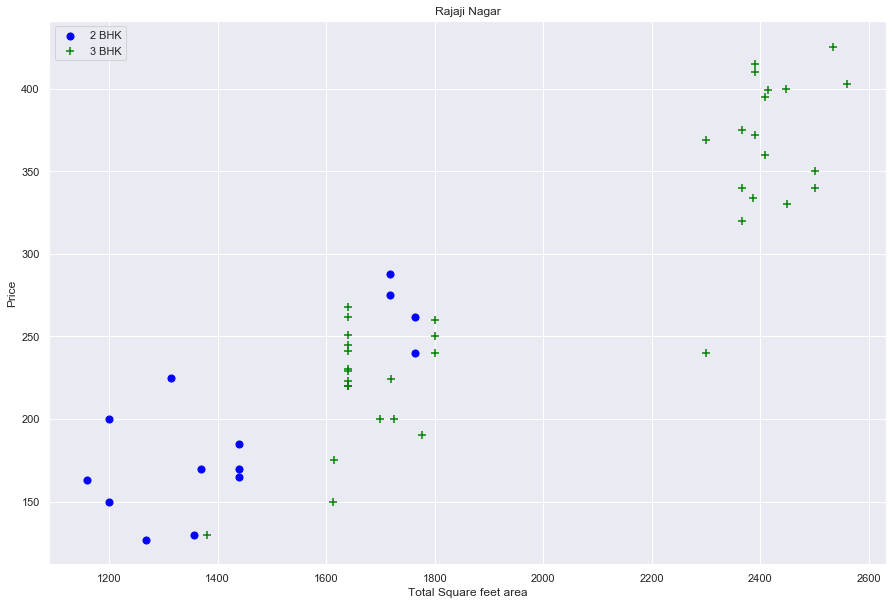

In [41]:
import matplotlib
import matplotlib.pyplot as plt

def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s =50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s =50)
    plt.xlabel("Total Square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter(df7,"Rajaji Nagar")

In [42]:
#Dictionary for stats per bhk
{
    '1':{
        'mean':4000,
        'std':2000,
        'count':34
    },
    
    '2':{
        'mean':4300,
        'std':2300,
        'count':22
    }
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [43]:
#Removing those 2 BHK apartments whose price_per_sqft is less than mean_price_per_sqft of 1 BHK apartments 

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

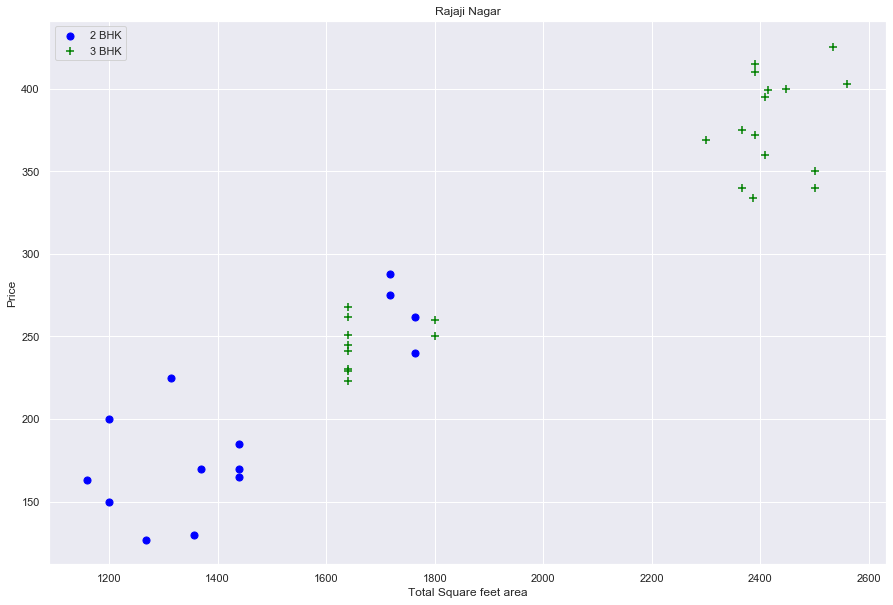

In [44]:
plot_scatter(df8,"Rajaji Nagar")

Text(0, 0.5, 'count')

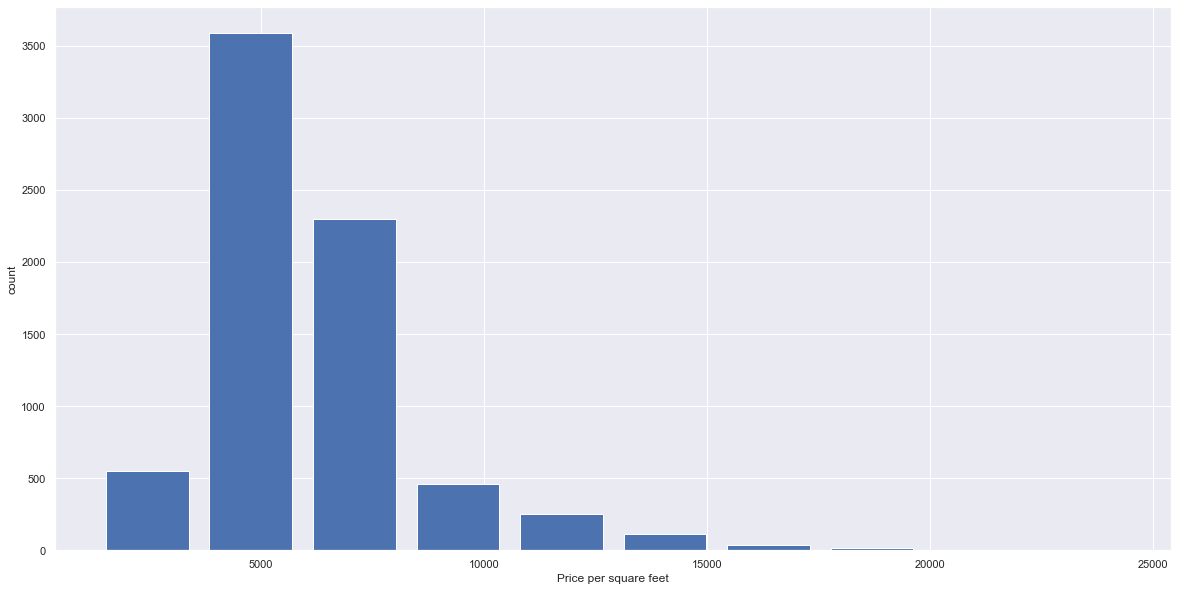

In [45]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("count")

In [46]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
df8[df8.bath>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,0.0,160.0,10,4000.000000
5925,Other,12000.0,12.0,0.0,525.0,10,4375.000000
6014,Other,10000.0,16.0,0.0,550.0,16,5500.000000
6747,Other,6000.0,12.0,0.0,150.0,11,2500.000000
7078,Other,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

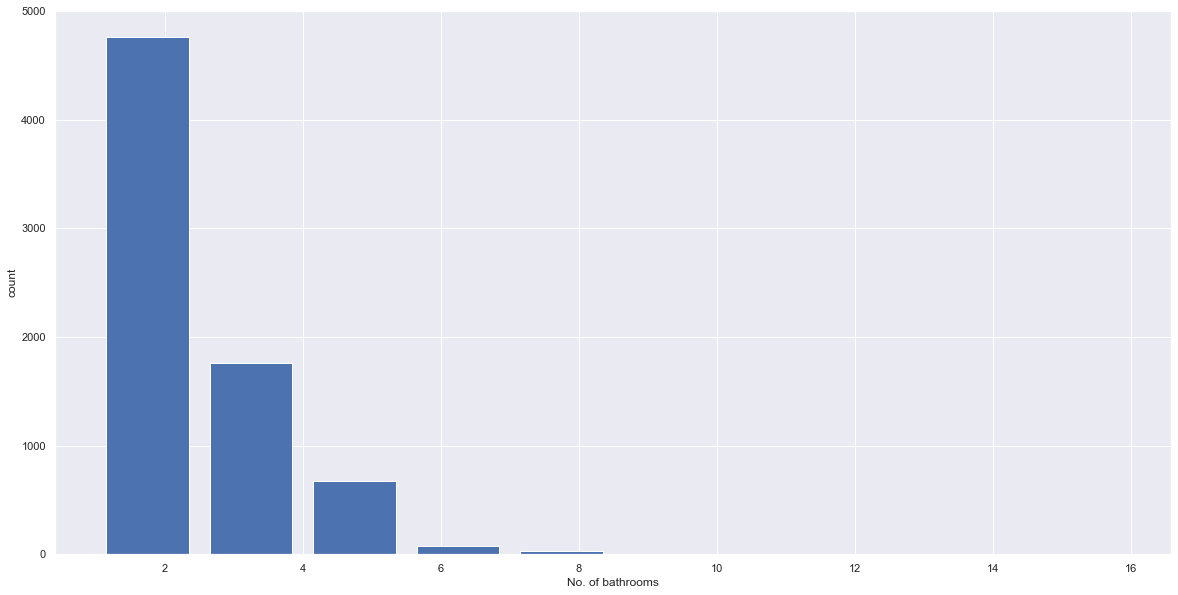

In [48]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("No. of bathrooms")
plt.ylabel("count")

In [49]:
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,0.0,450.0,4,6428.571429
5850,Other,11338.0,9.0,1.0,1000.0,6,8819.897689
9012,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330


In [50]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [51]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(20)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,0.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3


Model Building 

In [52]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11 = pd.concat([df10,dummies.drop('Other', axis='columns')], axis='columns')
df11.head()#OneHotEncoding & dummy trap variable removal for 'location'

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11.balcony.unique()

array([1., 2., 3., 0.])

In [55]:
dummies_balcony = pd.get_dummies(df11.balcony)
dummies_balcony.head()

,0.0,1.0,2.0,3.0
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [56]:
df12 = pd.concat([df11,dummies_balcony.drop(0, axis='columns')], axis='columns')
df12.head(20)#OneHotEncoding & dummy trap variable removal for 'balcony'

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,1.0,2.0,3.0
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1st Phase JP Nagar,1500.0,5.0,0.0,85.0,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
df13 = df12.drop(['location', 'balcony'],axis='columns')
df13.head(20)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,1.0,2.0,3.0
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
df13.shape

(7251, 248)

In [59]:
X = df13.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,1.0,2.0,3.0
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
y = df13['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [62]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.8546626182390626

In [63]:
#K-fold Cross Validation 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85466262, 0.84242524, 0.84805481, 0.85258628, 0.87171972])

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos={
        'linear_regression': {
            'model': LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best', 'random']
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
            
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.853890,{'normalize': True}
1,lasso,0.727783,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.709790,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [67]:
X.columns

Index([               'total_sqft',                      'bath',
                             'bhk',       '1st Block Jayanagar',
              '1st Phase JP Nagar', '2nd Phase Judicial Layout',
            '2nd Stage Nagarbhavi',      '5th Block Hbr Layout',
              '5th Phase JP Nagar',        '6th Phase JP Nagar',
       ...
                     'Vittasandra',                'Whitefield',
                  'Yelachenahalli',                 'Yelahanka',
              'Yelahanka New Town',               'Yelenahalli',
                    'Yeshwanthpur',                         1.0,
                               2.0,                         3.0],
      dtype='object', length=247)

In [81]:
def predict_price(location, sqft, bath, bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]= sqft
    x[1]= bath
    x[2]= bhk
    #x[3]= balcony
    if loc_index >= 0:
        x[loc_index] = 1
    
    return regressor.predict([x])[0]

In [82]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

88.55293370121825

In [83]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

92.49274431607375

In [84]:
predict_price('Whitefield', 1000, 3, 3)

55.93645949570809

In [86]:
predict_price('Indira Nagar', 1000, 3, 3)

177.27889943035512

In [87]:
import pickle 
with open('Bangalore_House_prices_model.pickle', 'wb') as f:
    pickle.dump(regressor, f)

In [92]:
import json
columns = {
    'data_columns' : [str(col).lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))